### In this notebook, a Convolutional Neural Network is trained on Plant Seedling dataset from Kaggle 

#### https://www.kaggle.com/c/plant-seedlings-classification

In [3]:
# Import libraries
import numpy as np 
import pandas as pd
# Fastai library is a wrapper on top of pytorch and it has a range of functions which are useful for implementing 
# Deep Learning models.
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

['test', 'train', 'sample_submission.csv']


In [4]:
!rm -rf input

In [5]:
!cp -r ../input .

In [6]:
data_path = Path('input/train/')

In [7]:
# Training data is loaded from the folder in batches of 32 images and it is normalized.
seedling_data = ImageDataBunch.from_folder(data_path,test='../test', ds_tfms=get_transforms(),valid_pct=0.25,size=299,bs=32)
seedling_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Black-grass,Black-grass,Black-grass,Black-grass,Black-grass
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Common Chickweed,Loose Silky-bent,Loose Silky-bent,Common Chickweed,Common Chickweed
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: EmptyLabelList
,,,,
Path: input/train

In [9]:
# There are 12 data classes
print(seedling_data.classes)
len(seedling_data.classes),seedling_data.c

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


(12, 12)

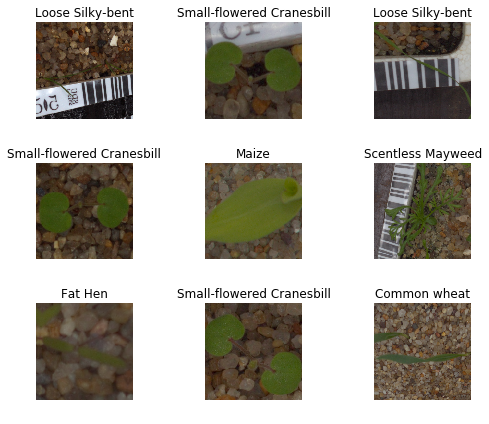

In [10]:
seedling_data.show_batch(rows=3,figsize=(7,6))

### Resnet 50 is the CNN model used for transfer learning. It contains residual blocks that allow us to build large 50 layer CNN by adding an identity function that simplifies the optimization process while training the Neural Network.

<img src="images/4.png">

<img src="images/3.jpeg">

<img src="images/2.png">

In [12]:
resnet_cnn = create_cnn(seedling_data,models.resnet50,metrics=error_rate)

In [13]:
# We find the best learning rate which is plotted in the next graph
resnet_cnn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


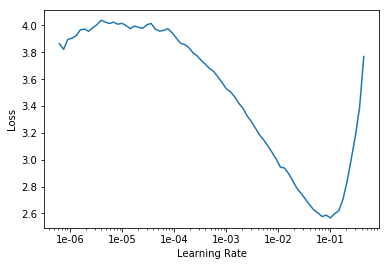

In [14]:
# The plot shoes that 1e-02 and 1e-01 are best learning rates
resnet_cnn.recorder.plot()

In [15]:
# CNN is trained for 6 iterations
resnet_cnn.fit_one_cycle(6,slice(1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,1.197606,0.598308,0.188711,01:40
1,0.769237,0.454903,0.120472,01:36
2,0.538514,0.364642,0.093513,01:36
3,0.331496,0.264639,0.080034,01:37
4,0.228601,0.139261,0.043808,01:37
5,0.156875,0.140648,0.047178,01:37


In [16]:
# The model is saved
resnet_cnn.save('resnet50_1')

In [17]:
# Model is loaded
resnet_cnn.load('resnet50_1')

Learner(data=ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Black-grass,Black-grass,Black-grass,Black-grass,Black-grass
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
Common Chickweed,Loose Silky-bent,Loose Silky-bent,Common Chickweed,Common Chickweed
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: EmptyLabelList
,,,,
Path: input/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, 

In [18]:
# Test data is loaded from the folder in batches of 32 images and it is normalized.
seedling_data = ImageDataBunch.from_folder(data_path,test='../test', ds_tfms=get_transforms(),valid_pct=0.25,size=350,bs=32)
seedling_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3563 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: CategoryList
Black-grass,Black-grass,Black-grass,Black-grass,Black-grass
Path: input/train;

Valid: LabelList (1187 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: CategoryList
Common Chickweed,Black-grass,Shepherds Purse,Fat Hen,Common Chickweed
Path: input/train;

Test: LabelList (794 items)
x: ImageList
Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350),Image (3, 350, 350)
y: EmptyLabelList
,,,,
Path: input/train

In [19]:
# The predicts in test dataset are plotted and the precision recall is found out.
seedling_metric = ClassificationInterpretation.from_learner(resnet_cnn)
from sklearn import metrics
print(metrics.classification_report(seedling_metric.y_true.numpy(), seedling_metric.pred_class.numpy(),target_names =seedling_data.classes))

                           precision    recall  f1-score   support

              Black-grass       0.79      0.69      0.74        71
                 Charlock       1.00      0.97      0.99       109
                 Cleavers       0.97      0.98      0.97        58
         Common Chickweed       0.98      0.99      0.98       154
             Common wheat       0.93      0.89      0.91        57
                  Fat Hen       0.98      1.00      0.99       113
         Loose Silky-bent       0.87      0.94      0.90       164
                    Maize       1.00      0.98      0.99        60
        Scentless Mayweed       0.98      0.98      0.98       130
          Shepherds Purse       0.96      0.93      0.94        54
Small-flowered Cranesbill       0.99      1.00      1.00       125
               Sugar beet       0.97      0.96      0.96        92

                 accuracy                           0.95      1187
                macro avg       0.95      0.94      0.95    

In [20]:
seedling_pred,y=resnet_cnn.get_preds(ds_type=DatasetType.Test)

In [21]:
seedling_pred = np.argmax(seedling_pred, axis = 1)
seedling_pred_classes = [seedling_data.classes[i] for i in seedling_pred]

In [22]:
seedling_pred[:5]

tensor([10,  6,  3,  4,  3])

In [23]:
seedling_pred_classes[:5]

['Small-flowered Cranesbill',
 'Loose Silky-bent',
 'Common Chickweed',
 'Common wheat',
 'Common Chickweed']